In [3]:
!cp '/content/drive/MyDrive/Kase_D/Project_2/archive.zip' '/content/archive.zip' && unzip '/content/archive.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Face Mask Dataset/Train/WithoutMask/1855.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1856.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1857.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1858.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1859.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1860.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1861.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1862.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1863.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1864.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1865.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1866.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1867.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1868.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1869.png  
  inflating: Face Mask Dataset/Train/WithoutMask/

In [4]:
import os
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [5]:
train_images_path = '/content/Face Mask Dataset/Train'
valid_images_path = '/content/Face Mask Dataset/Validation'
test_images_path = '/content/Face Mask Dataset/Test'

In [6]:
list_train_filenames = []
list_valid_filenames = []
list_test_filenames = []

In [7]:
for train_images_filename in glob.glob(train_images_path + '/*/*.png'):
  # print(train_images_filename)
  list_train_filenames.append(train_images_filename)

for valid_images_filename in glob.glob(valid_images_path + '/*/*.png'):
  list_valid_filenames.append(valid_images_filename)

for test_images_filename in glob.glob(test_images_path + '/*/*.png'):
  list_test_filenames.append(test_images_filename)

In [8]:
print(len(list_train_filenames))
print(len(list_valid_filenames))
print(len(list_test_filenames))

10000
800
992


In [9]:
list_train_images = []
list_valid_images = []
list_test_images = []

In [10]:
list_train_labels = []
list_valid_labels = []
list_test_labels = []

In [11]:
for train_images in list_train_filenames:
  list_train_images.append(np.array(Image.open(train_images).resize([150, 150])))
  label = train_images.split('/')[4]
  if label == 'WithoutMask':
    list_train_labels.append(0)
  else:
    list_train_labels.append(1)

for valid_images in list_valid_filenames:
  list_valid_images.append(np.array(Image.open(valid_images).resize([150, 150])))
  label = valid_images.split('/')[4]
  if label == 'WithoutMask':
    list_valid_labels.append(0)
  else:
    list_valid_labels.append(1)

for test_images in list_test_filenames:
  list_test_images.append(np.array(Image.open(test_images).resize([150, 150])))
  label = test_images.split('/')[4]
  if label == 'WithoutMask':
    list_test_labels.append(0)
  else:
    list_test_labels.append(1)

In [12]:
print(len(list_train_images))
print(len(list_valid_images))
print(len(list_test_images))

10000
800
992


In [13]:
print(len(list_train_labels))
print(len(list_valid_labels))
print(len(list_test_labels))

10000
800
992


In [14]:
idx = np.random.randint(0, len(list_train_labels))

In [15]:
if list_train_labels[idx] == 0:
  label = 'WithoutMask'
else:
  label = 'Mask'

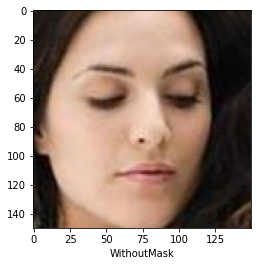

In [16]:
plt.xlabel(label)
plt.imshow(list_train_images[idx])

In [17]:
X_train, Y_train = np.stack(list_train_images), np.stack(list_train_labels)
X_valid, Y_valid = np.stack(list_valid_images), np.stack(list_valid_labels)
X_test, Y_test = np.stack(list_test_images), np.stack(list_test_labels)

In [18]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy

In [19]:
class MaskClassifier():
  def __init__(self):
    self.model = None
    self.label = ['WithoutMask', 'Mask']

  def build_model(self):
    input_layer = Input(shape=[150, 150, 3])
    conv_2d_layer_1 = Conv2D(filters=32, kernel_size=3, activation="relu")(input_layer)
    max_pooling_layer_1 = MaxPooling2D()(conv_2d_layer_1)
    conv_2d_layer_2 = Conv2D(filters=64, kernel_size=3, activation='relu')(max_pooling_layer_1)
    max_pooling_layer_2 = MaxPooling2D()(conv_2d_layer_2)
    conv_2d_layer_3 = Conv2D(filters=128, kernel_size=3, activation='relu')(max_pooling_layer_2)
    max_pooling_layer_3 = MaxPooling2D()(conv_2d_layer_3)
    conv_2d_layer_4 = Conv2D(filters=128, kernel_size=3, activation='relu')(max_pooling_layer_3)
    max_pooling_layer_4 = MaxPooling2D()(conv_2d_layer_4)
    flatten_layer = Flatten()(max_pooling_layer_4)
    dense_layer_1 = Dense(32)(flatten_layer)
    output_layer = Dense(1, activation="sigmoid")(dense_layer_1)

    self.model = Model(input_layer, output_layer)
    self.model.summary()

  def train_model(self, X_train, Y_train, X_valid, Y_valid):
    optimizer = Adam(learning_rate=1e-4)
    loss = BinaryCrossentropy()
    metric = BinaryAccuracy()

    self.model.compile(optimizer=optimizer, loss=loss, metrics=[metric])
    self.model.fit(x=X_train, y=Y_train, batch_size=32, validation_data=(X_valid, Y_valid), epochs=10)

  def save_model(self):
    self.model.save('/content/classifier.h5')

  def load_model(self):
    self.model = load_model('/content/classifier.h5')

In [20]:
classifier = MaskClassifier()

In [21]:
classifier.build_model()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856 

In [22]:
classifier.train_model(X_train, Y_train, X_valid, Y_valid)

Epoch 1/10
313/313 [==============================] - 21s 26ms/step - loss: 0.3236 - binary_accuracy: 0.9463 - val_loss: 0.2153 - val_binary_accuracy: 0.9388
Epoch 2/10
313/313 [==============================] - 8s 24ms/step - loss: 0.0437 - binary_accuracy: 0.9859 - val_loss: 0.0284 - val_binary_accuracy: 0.9875
Epoch 3/10
313/313 [==============================] - 8s 24ms/step - loss: 0.0272 - binary_accuracy: 0.9896 - val_loss: 0.0711 - val_binary_accuracy: 0.9750
Epoch 4/10
313/313 [==============================] - 8s 24ms/step - loss: 0.0215 - binary_accuracy: 0.9932 - val_loss: 0.0220 - val_binary_accuracy: 0.9925
Epoch 5/10
313/313 [==============================] - 8s 24ms/step - loss: 0.0132 - binary_accuracy: 0.9950 - val_loss: 0.0104 - val_binary_accuracy: 0.9962
Epoch 6/10
313/313 [==============================] - 8s 24ms/step - loss: 0.0084 - binary_accuracy: 0.9973 - val_loss: 0.0118 - val_binary_accuracy: 0.9950
Epoch 7/10
313/313 [==============================] - 8s 

In [23]:
classifier.model.evaluate(X_test, Y_test)

31/31 [==============================] - 0s 11ms/step - loss: 0.0805 - binary_accuracy: 0.9869


[0.0804840698838234, 0.9868951439857483]

In [29]:
classifier.save_model()

In [24]:
img = Image.open('/content/Face Mask Dataset/Test/WithMask/1163.png').resize((150, 150))

In [25]:
idx = np.random.randint(0, len(list_test_labels))

In [26]:
X_test[idx].shape

(150, 150, 3)

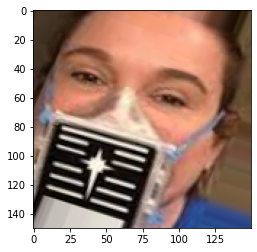

In [27]:
plt.imshow(X_test[idx])

In [28]:
pred_prob = classifier.model.predict(X_test[idx].reshape((1, 150, 150, 3)))
print(int(pred_prob))

1
